In [9]:
import xarray as xr
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt

from skill import config
from skill import recorte
from skill import plot
from skill import clima

In [10]:
dir_dados = config.dir_dados
dir_img = config.dir_img
dir_shp = config.dir_shp

In [11]:
ds = xr.open_dataset(f'{dir_dados}/precip.comb.v2020to2019-v2020monitorafter.total.nc')
br_madeira = gpd.read_file(f'{dir_shp}/brasil_madeira.shp')

In [4]:
start = ['1961-01-01', '1981-01-01', '1991-01-01']
end = ['1990-01-01', '2010-01-01', '2020-01-01']
step = [0, 1, 2]

1961-01-01 1990-01-01 0
1981-01-01 2010-01-01 1
1991-01-01 2020-01-01 2


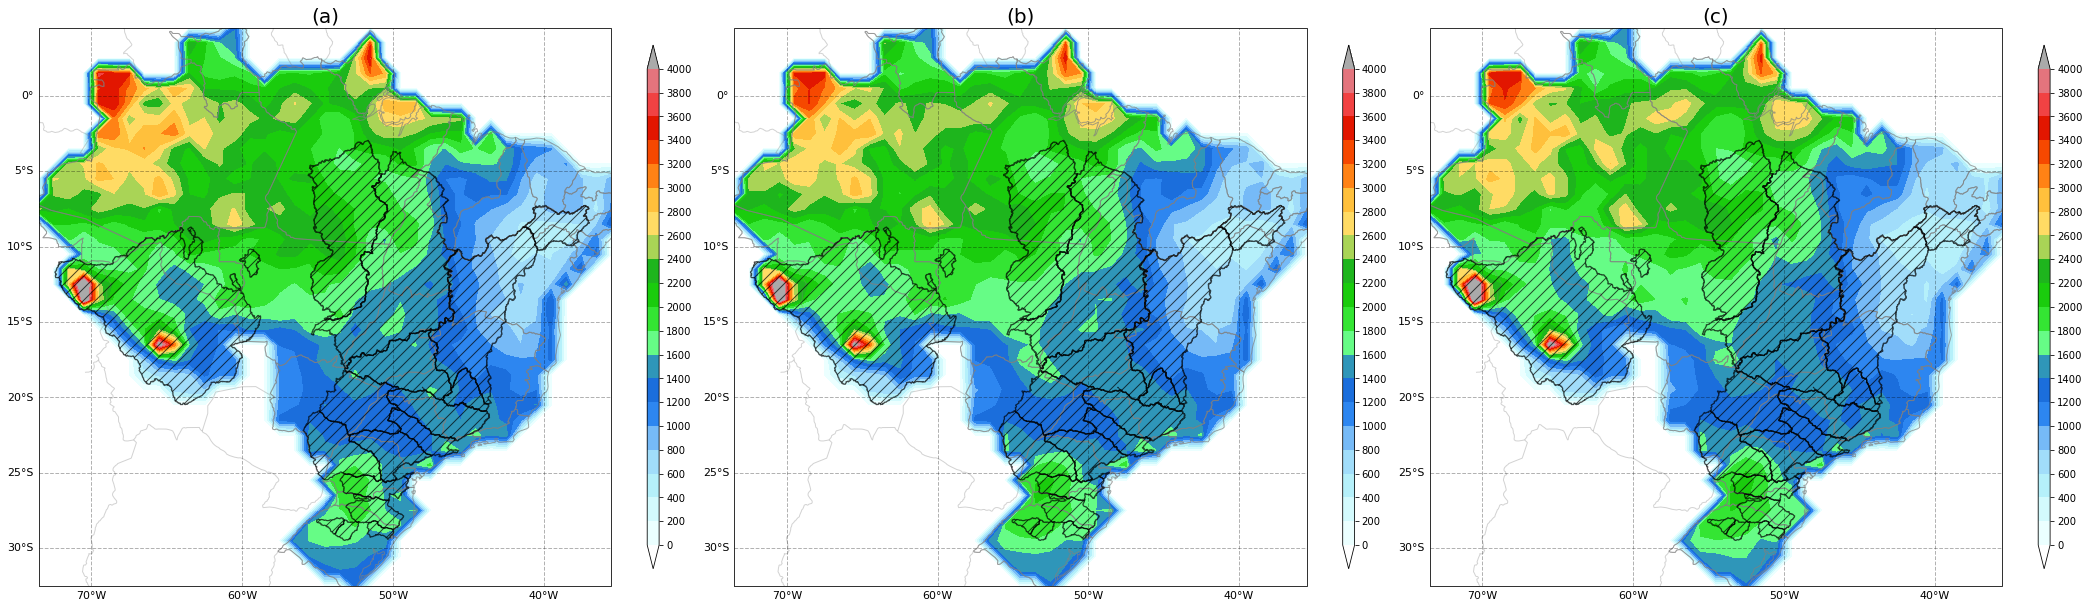

In [8]:
fig,ax = plt.subplots(1,3, figsize=(30,10), subplot_kw=dict(projection = ccrs.PlateCarree()))

for inicio, fim, i in zip(start, end, step):
    print(inicio, fim, i)

    clim = clima.climatologia(ds, inicio, fim)
    clim_br = recorte.recortar(clim, br_madeira)
    ax[0].set_title('(a)', fontsize=20)
    ax[1].set_title('(b)', fontsize=20)
    ax[2].set_title('(c)', fontsize=20)
    plot.plot_contour(ax[i], clim_br.precip.sum('month'), levels=range(0,4200,200))
    fig.tight_layout()
    
fig.savefig(dir_img.joinpath('climatologias.png'), bbox_inches='tight', facecolor='w', edgecolor='w')